In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import preprocessing
import os
import sys

In [3]:
blocks = gpd.read_file('./2010_Census_Block_Groups/2010_Census_Block_Groups.shp')
block_durham = blocks.loc[blocks['GEOID10'].str.contains('37063')].copy()

In [4]:
block_durham

GEOID10  TOTAL_POP  onemapSDEA    ShapeSTAre    ShapeSTLen  \
567   370630020072       2306         568  3.327465e+06  12936.094372   
568   370630003013        757         569  2.619680e+05   2085.876960   
569   370630021003       1899         570  5.046659e+07  33296.371441   
570   370630015022       1024         571  1.727452e+05   1624.330286   
571   370630019002       2118         572  4.467965e+07  40280.193040   
...            ...        ...         ...           ...           ...   
1164  370630020173       3007        1165  6.106268e+06  11571.357743   
1165  370630020183       2455        1166  8.784360e+06  13293.565025   
1166  370630020191       1399        1167  4.932973e+06  13496.603099   
1167  370630020193       1473        1168  3.553276e+06   7757.979203   
1168  370630020201       2032        1169  7.202898e+06  18809.937984   

                                               geometry  
567   POLYGON ((615811.488 244972.227, 615815.277 24...  
568   POLYGON ((617287.593 250684.046, 617232.150 25...  
569   POLYGON ((616909.079 276085.832, 616954.027 27...  
570   POLYGON ((614635.975 250959.437, 614638.952 25...  
571   POLYGON ((632044.779 242038.546, 632012.234 24...  
...                                                 ...  
1164  POLYGON ((611792.679 246888.606, 611797.729 24...  
1165  POLYGON ((609993.415 241383.675, 610004.240 24...  
1166  POLYGON ((611420.077 238189.362, 611421.871 23...  
1167  POLYGON ((611421.599 238251.494, 611421.871 23...  
1168  POLYGON ((613004.821 234704.349, 612855.451 23...  

[153 rows x 6 columns]

In [5]:
neighbors_dict = {}
intersections = block_durham.intersection(block_durham)
lines = ""
for index, block in block_durham.iterrows():   
    neighbors_dict[block.GEOID10] = []
    # get 'not disjoint' countries
    neighbors = block_durham[~block_durham.geometry.disjoint(block.geometry)]

    # remove own name of the country from the list
    # neighbors = [ name for name in neighbors if block.GEOID10 != name ]
    potential_neighbours = []
    
    # break
    # li
    for index, n in neighbors.iterrows():
        # print(n.geometry)
        if n.GEOID10 != block.GEOID10:
            ints = block.geometry.intersection(n.geometry)
            if int(ints.length) != 0:
                lines += "{}\t{}\t1\n".format(block.GEOID10, n.GEOID10)
                potential_neighbours.append(n.GEOID10)
    # current = block_durham[block_durham['GEOID10'] == block.GEOID10] 
    # neighs = block_durham[block_durham.GEOID10.isin(potential_neighbours)]
    # current.intersection(neighs)
    # add names of neighbors as NEIGHBORS value
    # neighbors_dict[block.GEOID10] = neighbors

In [6]:
fo = open("DURHAMCT_neighbors_1.txt", "w")
fo.write(lines)
fo.close()

In [7]:
bg_black = pd.read_csv('bg_asian/bg_black.csv')

In [8]:
def convertHeader(df):
    df['GEO_ID'] = df['GEO_ID'].str[9:]
    df.columns = df.iloc[0]
    df = df.drop(index=0).rename(columns = {"":"GEOID10"})
    
    cols = df.columns.tolist()

    for i in range(len(cols)):
        col = cols[i].replace("!!"," ")
        cols[i] = col
    df.columns = cols
    
    return df 

In [18]:
block_durham_geom = block_durham[['GEOID10','geometry']]

In [9]:
# bg_black = pd.read_csv('BlockGroupData/')
bg_black = convertHeader(bg_black)
bg_black = bg_black[['GEOID10','Total Male 5 to 9 years','Total Female 5 to 9 years']]
#bg_black = bg_black.merge(block_durham_geom, how = "inner", left_on = 'GEOID10', right_on = 'GEOID10')
bg_black['Total Male 5 to 9 years'] =  bg_black['Total Male 5 to 9 years'].astype('int64')
bg_black['Total Female 5 to 9 years'] =  bg_black['Total Female 5 to 9 years'].astype('int64')
bg_black['Total'] = bg_black['Total Male 5 to 9 years'] + bg_black['Total Female 5 to 9 years']
bg_black = bg_black[['GEOID10','Total']].copy()

In [10]:
bg_white = pd.read_csv('bg_asian/bg_white.csv')
bg_white = convertHeader(bg_white)
bg_white = bg_white[['GEOID10','Geographic Area Name','Total Male 5 to 9 years','Total Female 5 to 9 years']]
#bg_white = bg_white.merge(block_durham_geom, how = "inner", left_on = 'GEOID10', right_on = 'GEOID10')
bg_white['Total Male 5 to 9 years'] =  bg_white['Total Male 5 to 9 years'].astype('int64')
bg_white['Total Female 5 to 9 years'] =  bg_white['Total Female 5 to 9 years'].astype('int64')
bg_white['Total'] = bg_white['Total Male 5 to 9 years'] + bg_white['Total Female 5 to 9 years']
bg_white = bg_white[['GEOID10','Total']].copy()

In [13]:
bg_hispanic = pd.read_csv('bg_asian/bg_hispanic.csv')
bg_hispanic = convertHeader(bg_hispanic)
bg_hispanic = bg_hispanic[['GEOID10','Geographic Area Name','Total Male 5 to 9 years','Total Female 5 to 9 years']]
#bg_hispanic = bg_hispanic.merge(block_durham_geom, how = "inner", left_on = 'GEOID', right_on = 'GEOID10')
bg_hispanic['Total Male 5 to 9 years'] =  bg_hispanic['Total Male 5 to 9 years'].astype('int64')
bg_hispanic['Total Female 5 to 9 years'] =  bg_hispanic['Total Female 5 to 9 years'].astype('int64')
bg_hispanic['Total'] = bg_hispanic['Total Male 5 to 9 years'] + bg_hispanic['Total Female 5 to 9 years']
bg_hispanic = bg_hispanic[['GEOID10','Total']].copy()

In [14]:
bg_asian = pd.read_csv('bg_asian/bg_asian.csv')
bg_asian = convertHeader(bg_asian)
bg_asian = bg_asian[['GEOID10','Geographic Area Name','Total Male 5 to 9 years','Total Female 5 to 9 years']]
#bg_asian = bg_asian.merge(block_durham_geom, how = "inner", left_on = 'GEOID', right_on = 'GEOID10')
bg_asian['Total Male 5 to 9 years'] =  bg_asian['Total Male 5 to 9 years'].astype('int64')
bg_asian['Total Female 5 to 9 years'] =  bg_asian['Total Female 5 to 9 years'].astype('int64')
bg_asian['Total'] = bg_asian['Total Male 5 to 9 years'] + bg_asian['Total Female 5 to 9 years']
bg_asian = bg_asian[['GEOID10','Total']].copy()

In [15]:
bg_total1 = bg_black.merge(bg_white, how = "inner", left_on = 'GEOID10', right_on = 'GEOID10',suffixes=("_black",'_white'))
bg_total2 = bg_hispanic.merge(bg_asian, how = "inner", left_on = 'GEOID10', right_on = 'GEOID10',suffixes=("_hispanic",'_asian'))
bg_total = bg_total1.merge(bg_total2, how = "inner", left_on = 'GEOID10', right_on = 'GEOID10' )
bg_total['Total'] = bg_total['Total_black'] + bg_total['Total_white'] + bg_total['Total_hispanic'] + bg_total['Total_asian']
bg_total = bg_total[['GEOID10','Total_white','Total']]
bg_total.columns = ['GEOID','Total_white','Total']

## Reading the district plan

In [19]:
txt_file = "../mergesplitcodebase-master/Output/DurhamCT/gamma1_seed912311/Samples/0.txt"
df = pd.read_csv(txt_file, delimiter = "\t", header = None)
df.columns = ["GEOID", "AttendenceZone"]
df['GEOID'] = df['GEOID'].astype('str')
merged_bg = df.merge(bg_total, how = "inner", on = 'GEOID')
merged_bg_attendencezone_total = merged_bg[['AttendenceZone','Total_white','Total']].copy()
grouped_by_az = merged_bg_attendencezone_total.groupby(['AttendenceZone']).sum()
grouped_by_az['PercentageOfWhite'] = grouped_by_az['Total_white']/grouped_by_az['Total']
sorted_group = grouped_by_az['PercentageOfWhite'].sort_values()

In [20]:
merged_bg_geom = block_durham_geom.merge(merged_bg, 
                                 how = "inner", left_on = 'GEOID10', 
                                 right_on = 'GEOID').copy()

In [21]:
merged_bg_geom['AttendenceZone'] = merged_bg_geom['AttendenceZone'].astype('str')

<AxesSubplot:>

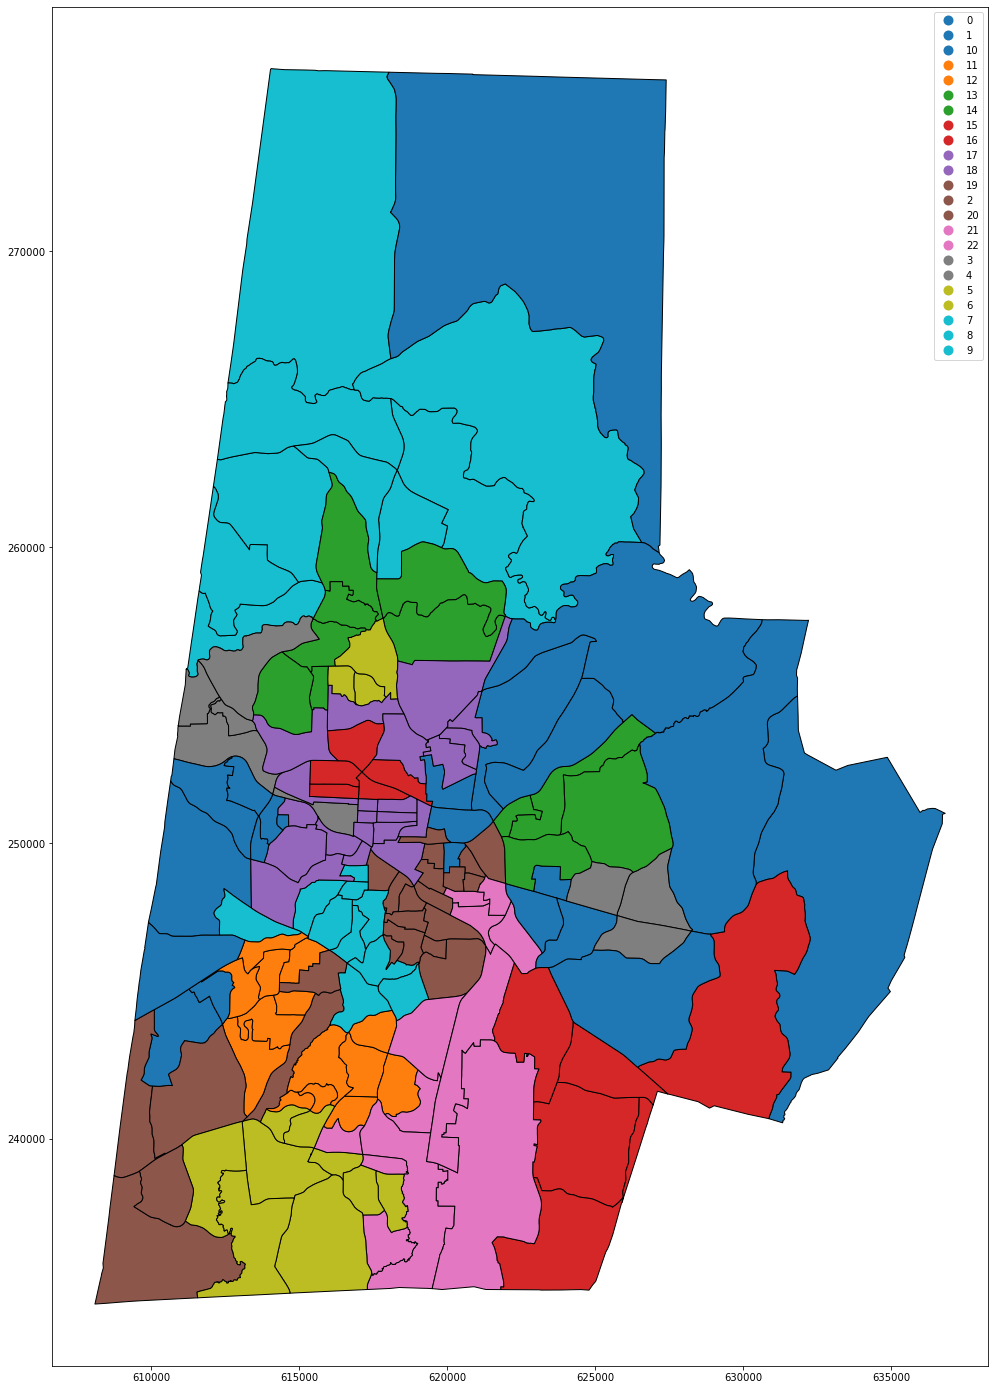

In [22]:
txt_file = "../mergesplitcodebase-master/Output/DurhamCT/gamma1_seed912311/Samples/1.txt"
df = pd.read_csv(txt_file, delimiter = "\t", header = None)
df.columns = ["GEOID", "AttendenceZone"]
df['GEOID'] = df['GEOID'].astype('str')
merged_bg = df.merge(bg_total, how = "inner", on = 'GEOID')
merged_bg_attendencezone_total = merged_bg[['AttendenceZone','Total_white','Total']].copy()
grouped_by_az = merged_bg_attendencezone_total.groupby(['AttendenceZone']).sum()
grouped_by_az['PercentageOfWhite'] = grouped_by_az['Total_white']/grouped_by_az['Total']
sorted_group = grouped_by_az['PercentageOfWhite'].sort_values()

merged_bg_geom = block_durham_geom.merge(merged_bg, 
                                 how = "inner", left_on = 'GEOID10', 
                                 right_on = 'GEOID').copy()
merged_bg_geom['AttendenceZone'] = merged_bg_geom['AttendenceZone'].astype('str')
ig, ax = plt.subplots(1,1, figsize = (25,25))

merged_bg_geom.plot(ax = ax, legend = True, alpha = 1, linewidth = 1, edgecolor = 'black', column = 'AttendenceZone')

### Loop through the txt files and store in dictionary

In [24]:
hist_store = dict()

for i in range(23):
    hist_store[i] = []
directory = '../mergesplitcodebase-master/Output/DurhamCT/gamma1_seed912311/Samples/'
for index, filename in enumerate(os.listdir(directory)):
    if index == 50000:
        break
    if filename.endswith(".txt"):
        txt_file = os.path.join(directory, filename)
        df = pd.read_csv(txt_file, delimiter = "\t", header = None)
        df.columns = ["GEOID", "AttendenceZone"]
        df['GEOID'] = df['GEOID'].astype('str')
        merged_bg = df.merge(bg_total, how = "inner", on = 'GEOID')
        merged_bg_attendencezone_total = merged_bg[['AttendenceZone','Total_white','Total']].copy()
        grouped_by_az = merged_bg_attendencezone_total.groupby(['AttendenceZone']).sum()
        grouped_by_az['PercentageOfWhite'] = grouped_by_az['Total_white']/grouped_by_az['Total']
        sorted_group = grouped_by_az['PercentageOfWhite'].sort_values()

        for idx, val in enumerate(sorted_group):
            hist_store[idx].append(val)
    else:
        continue

    

In [102]:
%matplotlib inline
from ipywidgets import interactive

def plot_hist(idx):
    plt.hist(hist_store[idx])
    plt.ylim(ymin=0, ymax = 2000)
    plt.title('Histogram of percentage of white students for position {}'.format(idx))
    
interactive_plot = interactive(plot_hist, idx = (0,22))
interactive_plot

interactive(children=(IntSlider(value=11, description='idx', max=22), Output()), _dom_classes=('widget-interac…

In [106]:
df_bp = pd.DataFrame.from_dict(hist_store)

In [110]:
import seaborn as sns

In [114]:
sns.load_dataset("tips")

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

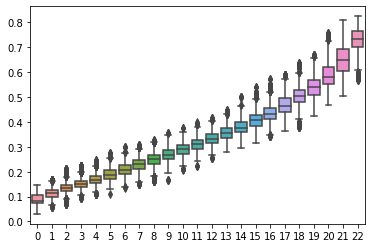

In [113]:
sns.boxplot(data=df_bp)

Text(0.5, 1.0, 'Histogram of percentage of least number of white students')

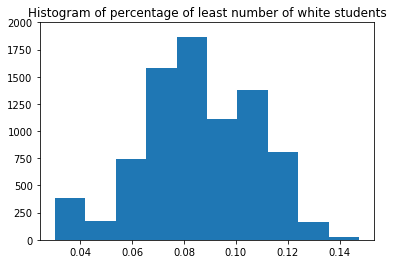

In [104]:
plt.hist(hist_store[0])
plt.ylim(ymin=0, ymax = 2000)
plt.title('Histogram of percentage of least number of white students')

In [141]:
df_np[i]

array([0.10433071, 0.10845588, 0.10987483, 0.12631579, 0.14190476,
       0.14485981, 0.14900154, 0.16213494, 0.16528926, 0.20666667,
       0.28727273, 0.28956835, 0.37406217, 0.38610478, 0.40036232,
       0.45707657, 0.49035533, 0.49614396, 0.56659389, 0.60301508,
       0.60899654, 0.62581699, 0.71017964])

In [155]:
from matplotlib.lines import Line2D

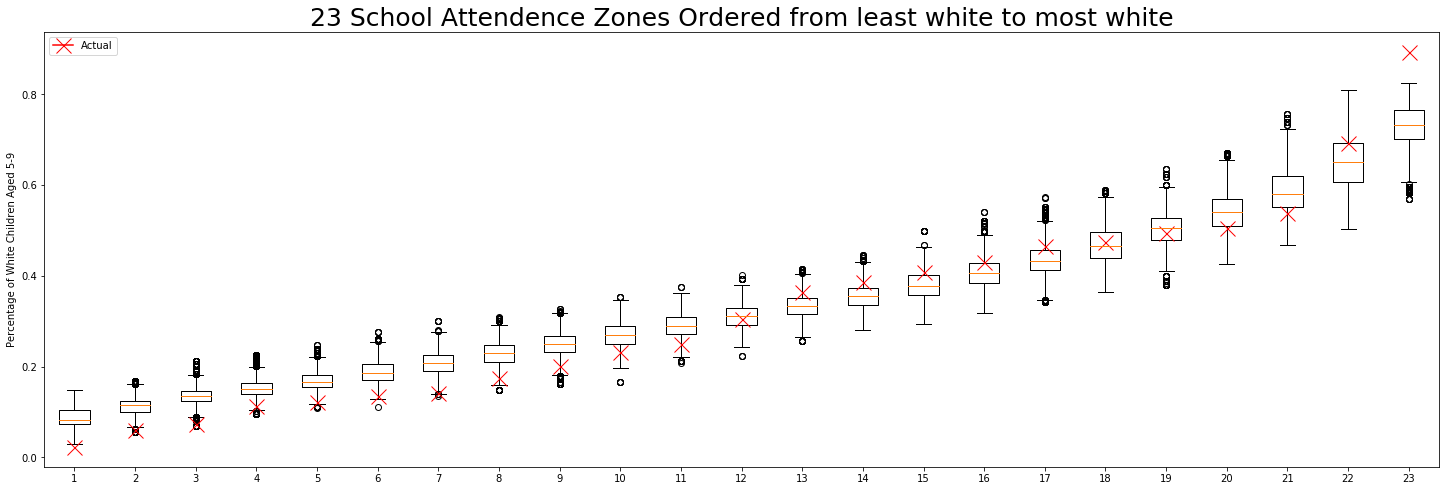

In [258]:
df_bp = pd.DataFrame.from_dict(hist_store)
from matplotlib.lines import Line2D
df_np = df_bp.to_numpy()
plt.boxplot(df_np)
plt.ylabel('Percentage of White Children Aged 5-9')

for i in range(23):
    plt.plot( 1+i, dict_actual[2010].reset_index().iloc[i,1], marker='x', color = 'red', markersize=15)
    #plt.plot( 1+i, dict_actual[2018].reset_index().iloc[i,1], marker='o', color = 'green')
    
legend_elements = [
                   Line2D([0], [0], marker='x', color='red', label='Actual',
                          markerfacecolor='g', markersize=15)] #,
                #Line2D([0], [0], marker='o', color='green', label='2018 Actual',
                 #         markerfacecolor='g', markersize=15)]
plt.legend(handles=legend_elements, loc = 'upper left')
plt.title('23 School Attendence Zones Ordered from least white to most white', fontsize = 25)

plt.rcParams["figure.figsize"] = (25,8)
#plt.show()
plt.savefig("23 School Attendence Zones Ordered from least white to most white.png")
#plt.show()

Text(0.5, 1.0, 'Histogram of percentage of least number of white students')

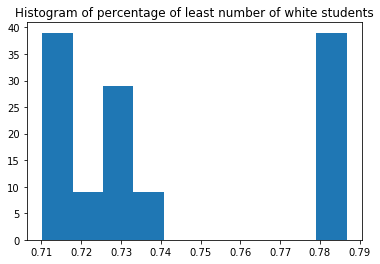

In [19]:
plt.hist(hist_store[22])
plt.title('Histogram of percentage of least number of white students')

In [22]:
current_neighborhoods = pd.read_csv("neighborhood2010-2018.csv")

In [32]:
dict_actual = dict()
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018]

In [33]:
for i in years:
    dict_actual[i] = current_neighborhoods[current_neighborhoods["year"] == i]["% white"].sort_values()

In [138]:
dict_actual[2010]

21    0.022523
18    0.060748
12    0.073333
2     0.113982
8     0.121867
10    0.134436
4     0.141635
5     0.175689
9     0.201883
17    0.231429
11    0.250319
22    0.305085
1     0.365344
19    0.385475
20    0.408929
14    0.429662
6     0.465849
0     0.474955
3     0.494432
15    0.505618
13    0.537864
16    0.692982
7     0.894040
Name: % white, dtype: float64

In [137]:
dict_actual[2010].reset_index().iloc[0,1]

0.022522522522522518

In [133]:
dict_actual[2010][0]

0.4749552772808587

In [131]:
plt.scatter(dict_actual[2010])

TypeError: scatter() missing 1 required positional argument: 'y'

In [30]:
current_neighborhoods[current_neighborhoods["year"] == 2010]["% white"].sort_values()

21    0.022523
18    0.060748
12    0.073333
2     0.113982
8     0.121867
10    0.134436
4     0.141635
5     0.175689
9     0.201883
17    0.231429
11    0.250319
22    0.305085
1     0.365344
19    0.385475
20    0.408929
14    0.429662
6     0.465849
0     0.474955
3     0.494432
15    0.505618
13    0.537864
16    0.692982
7     0.894040
Name: % white, dtype: float64

In [206]:
files = []
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        txt_file = os.path.join(directory, filename)
        files.append(txt_file)

In [67]:
len(files)

125

In [68]:
import random

In [81]:
random.randint(0,124)

36

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

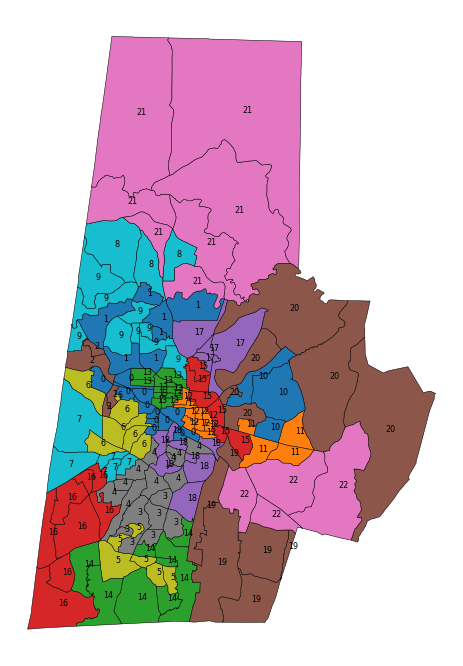

In [182]:
merged_bg_geom["center"] = merged_bg_geom["geometry"].centroid
merged_bg_geom_points = merged_bg_geom.copy()
merged_bg_geom_points.set_geometry("center", inplace = True)

ax = merged_bg_geom.plot(figsize = (15, 12), edgecolor = "black", linewidth = 0.5, column = "AttendenceZone")
plt.axis('off')
texts = []
for x, y, label in zip(merged_bg_geom_points.geometry.x, merged_bg_geom_points.geometry.y, merged_bg_geom_points["AttendenceZone"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

In [ ]:
merged_bg_geom["center"] = merged_bg_geom["geometry"].centroid
za_points = za.copy()
za_points.set_geometry("center", inplace = True)

ax = za.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["NAME_2"]):
    texts.append(plt.text(x, y, label, fontsize = 8))


In [208]:
elem_durham = gpd.read_file("Shapefile/Public_Elementary_School_Base_Assignment_Zones-shp/Public_Elementary_School_Base_Assignment_Zones.shp")

In [212]:
elem_durham.

OBJECTID         int64
facilityid      object
stateid         object
name            object
disttype        object
distarea       float64
CreationDa      object
Creator         object
EditDate        object
Editor          object
ShortName       object
LearnMore       object
SHAPESTAre     float64
SHAPESTLen     float64
geometry      geometry
dtype: object

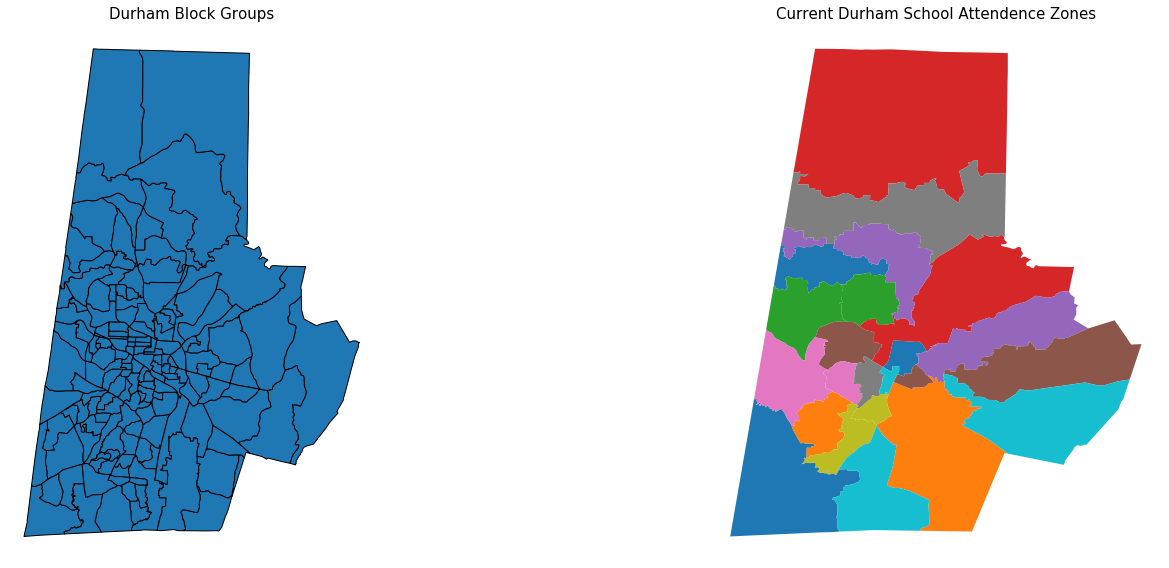

In [239]:
fig, axs = plt.subplots(1, 2)

block_durham.plot( edgecolor = 'black', ax = axs[0], figsize=(15,15) )
axs[0].axis('off')
axs[0].set_title('Durham Block Groups', fontsize = 15)

elem_durham.plot(column = 'facilityid', legend = False, alpha = 1, ax = axs[1] )
axs[1].axis('off')
axs[1].set_title('Current Durham School Attendence Zones', fontsize = 15)

fig.tight_layout()

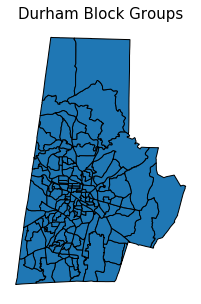

In [242]:
block_durham.plot( edgecolor = 'black',figsize = (8, 5) )
plt.axis('off')
plt.title('Durham Block Groups', fontsize = 15)
plt.savefig('Durham Block Groups.png')

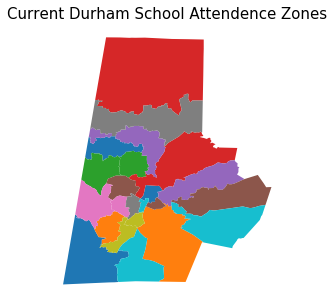

In [243]:
elem_durham.plot(column = 'facilityid', legend = False, alpha = 1, figsize = (8, 5))
plt.axis('off')
plt.title('Current Durham School Attendence Zones', fontsize = 15)
plt.savefig('Durham Attendence Zone.png')

In [210]:
sorted_group

AttendenceZone
14    0.077707
15    0.100000
11    0.138632
6     0.184534
4     0.192797
7     0.217814
13    0.235772
12    0.253359
3     0.260759
21    0.272258
2     0.316486
18    0.323291
0     0.338633
1     0.343681
10    0.388679
20    0.405263
17    0.432361
5     0.491039
16    0.568627
22    0.569050
19    0.636861
9     0.718191
8     0.744382
Name: PercentageOfWhite, dtype: float64

In [260]:
merged_bg_geom

GEOID10                                           geometry  \
0    370630020072  POLYGON ((615811.488 244972.227, 615815.277 24...   
1    370630003013  POLYGON ((617287.593 250684.046, 617232.150 25...   
2    370630021003  POLYGON ((616909.079 276085.832, 616954.027 27...   
3    370630015022  POLYGON ((614635.975 250959.437, 614638.952 25...   
4    370630019002  POLYGON ((632044.779 242038.546, 632012.234 24...   
..            ...                                                ...   
148  370630020173  POLYGON ((611792.679 246888.606, 611797.729 24...   
149  370630020183  POLYGON ((609993.415 241383.675, 610004.240 24...   
150  370630020191  POLYGON ((611420.077 238189.362, 611421.871 23...   
151  370630020193  POLYGON ((611421.599 238251.494, 611421.871 23...   
152  370630020201  POLYGON ((613004.821 234704.349, 612855.451 23...   

            GEOID AttendenceZone  Total_white  Total  \
0    370630020072             22           62    115   
1    370630003013             13           24     55   
2    370630021003              9           80     90   
3    370630015022              2            3      3   
4    370630019002             18           67    107   
..            ...            ...          ...    ...   
148  370630020173              8          123    152   
149  370630020183             19          110    156   
150  370630020191             22           41     76   
151  370630020193             22           50     59   
152  370630020201             22          123    178   

                            center  
0    POINT (614992.872 243054.945)  
1    POINT (617292.970 250886.667)  
2    POINT (615754.319 270707.367)  
3    POINT (614442.775 250737.940)  
4    POINT (633289.168 248345.784)  
..                             ...  
148  POINT (610971.071 245876.177)  
149  POINT (611590.793 241513.861)  
150  POINT (612055.372 238875.868)  
151  POINT (610525.006 238307.982)  
152  POINT (613384.384 236643.970)  

[153 rows x 7 columns]

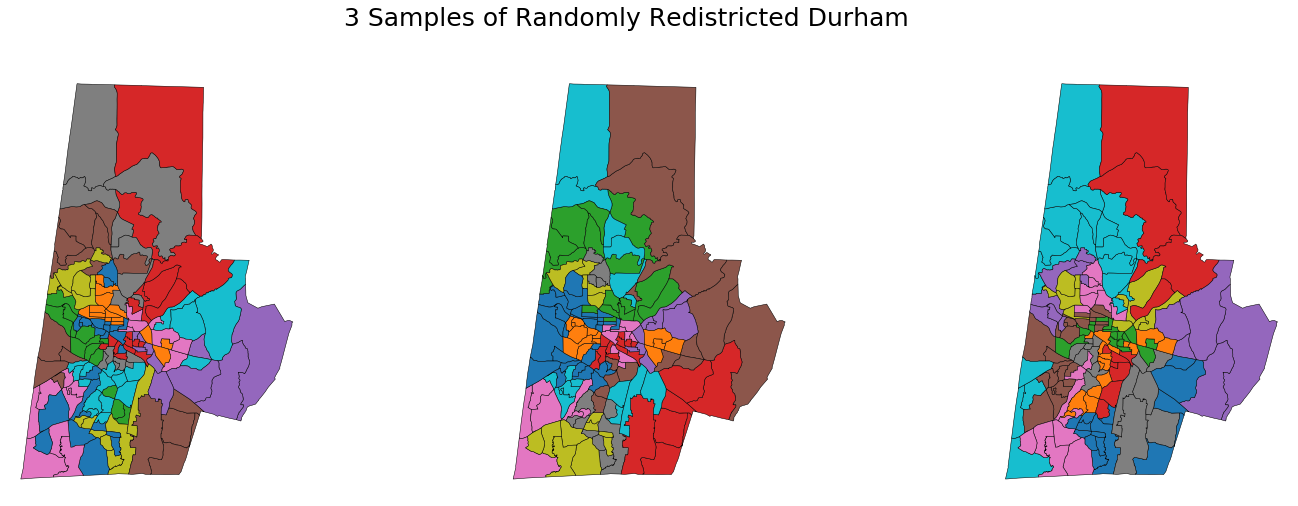

In [207]:
fig, axs = plt.subplots(1, 3)

for i in range(3):
    txt_file = files[random.randint(0,5000)]
    df = pd.read_csv(txt_file, delimiter = "\t", header = None)
    df.columns = ["GEOID", "AttendenceZone"]
    df['GEOID'] = df['GEOID'].astype('str')
    merged_bg = df.merge(bg_total, how = "inner", on = 'GEOID')
    merged_bg_attendencezone_total = merged_bg[['AttendenceZone','Total_white','Total']].copy()
    grouped_by_az = merged_bg_attendencezone_total.groupby(['AttendenceZone']).sum()
    grouped_by_az['PercentageOfWhite'] = grouped_by_az['Total_white']/grouped_by_az['Total']
    sorted_group = grouped_by_az['PercentageOfWhite'].sort_values()

    merged_bg_geom = block_durham_geom.merge(merged_bg, 
                                     how = "inner", left_on = 'GEOID10', 
                                     right_on = 'GEOID').copy()
    merged_bg_geom['AttendenceZone'] = merged_bg_geom['AttendenceZone'].astype('str')

    merged_bg_geom["center"] = merged_bg_geom["geometry"].centroid
    merged_bg_geom_points = merged_bg_geom.copy()
    merged_bg_geom_points.set_geometry("center", inplace = True)

    merged_bg_geom.plot(ax = axs[i],edgecolor = "black", linewidth = 0.5, column = "AttendenceZone")
    axs[i].axis('off')
    
fig.suptitle('3 Samples of Randomly Redistricted Durham', fontsize = 25)
#for x, y, label in zip(merged_bg_geom_points.geometry.x, merged_bg_geom_points.geometry.y, merged_bg_geom_points["AttendenceZone"]):
#    texts.append(plt.text(x, y, label, fontsize = 8))
#figsize = (8, 3)
#texts = []
#for x, y, label in zip(merged_bg_geom_points.geometry.x, merged_bg_geom_points.geometry.y, merged_bg_geom_points["AttendenceZone"]):
#    texts.append(plt.text(x, y, label, fontsize = 8))
fig.savefig("3 Samples of Randomly Redistricted Durham")
#ig, ax = plt.subplots(1,1, figsize = (25,25))

#merged_bg_geom.plot(ax = ax, legend = True, alpha = 1, linewidth = 1, edgecolor = 'black', column = 'AttendenceZone')

In [264]:
school_geoid = pd.read_csv("schools_geoid.txt", sep="\t", header = None)

In [270]:
school_geoid.columns = ['name','geoid']

In [275]:
school_geoid['geoid'] = school_geoid['geoid'].astype('str')

In [283]:
list(merged_bg_geom['GEOID'])

['370630020072',
 '370630003013',
 '370630021003',
 '370630015022',
 '370630019002',
 '370630019001',
 '370630007001',
 '370630016011',
 '370630016041',
 '370630020182',
 '370630017072',
 '370630018011',
 '370630017081',
 '370630020211',
 '370630020212',
 '370630020221',
 '370630020222',
 '370630020231',
 '370630016043',
 '370630016034',
 '370630017111',
 '370630016032',
 '370630011002',
 '370630018022',
 '370630018013',
 '370630018012',
 '370630020232',
 '370630020241',
 '370630020242',
 '370630020243',
 '370630020251',
 '370630006002',
 '370630017102',
 '370630017051',
 '370630017113',
 '370630020171',
 '370630020081',
 '370630016013',
 '370630020252',
 '370630020253',
 '370630020261',
 '370630020272',
 '370630020273',
 '370630020281',
 '370630020282',
 '370630020283',
 '370630016031',
 '370630017093',
 '370630014002',
 '370630011001',
 '370630020172',
 '370630023001',
 '370630023002',
 '370639801001',
 '370630018024',
 '370630018071',
 '370630018072',
 '370630018081',
 '370630017073

In [284]:
"370630020072" in list(merged_bg_geom['GEOID'])

True

In [286]:
merged_bg_geom['HasSchool'] = 0

In [287]:
merged_bg_geom

GEOID10                                           geometry  \
0    370630020072  POLYGON ((615811.488 244972.227, 615815.277 24...   
1    370630003013  POLYGON ((617287.593 250684.046, 617232.150 25...   
2    370630021003  POLYGON ((616909.079 276085.832, 616954.027 27...   
3    370630015022  POLYGON ((614635.975 250959.437, 614638.952 25...   
4    370630019002  POLYGON ((632044.779 242038.546, 632012.234 24...   
..            ...                                                ...   
148  370630020173  POLYGON ((611792.679 246888.606, 611797.729 24...   
149  370630020183  POLYGON ((609993.415 241383.675, 610004.240 24...   
150  370630020191  POLYGON ((611420.077 238189.362, 611421.871 23...   
151  370630020193  POLYGON ((611421.599 238251.494, 611421.871 23...   
152  370630020201  POLYGON ((613004.821 234704.349, 612855.451 23...   

            GEOID AttendenceZone  Total_white  Total  \
0    370630020072             22           62    115   
1    370630003013             13           24     55   
2    370630021003              9           80     90   
3    370630015022              2            3      3   
4    370630019002             18           67    107   
..            ...            ...          ...    ...   
148  370630020173              8          123    152   
149  370630020183             19          110    156   
150  370630020191             22           41     76   
151  370630020193             22           50     59   
152  370630020201             22          123    178   

                            center  HasSchool  
0    POINT (614992.872 243054.945)          0  
1    POINT (617292.970 250886.667)          0  
2    POINT (615754.319 270707.367)          0  
3    POINT (614442.775 250737.940)          0  
4    POINT (633289.168 248345.784)          0  
..                             ...        ...  
148  POINT (610971.071 245876.177)          0  
149  POINT (611590.793 241513.861)          0  
150  POINT (612055.372 238875.868)          0  
151  POINT (610525.006 238307.982)          0  
152  POINT (613384.384 236643.970)          0  

[153 rows x 8 columns]

In [288]:
for ind, i in enumerate(merged_bg_geom['GEOID10']):
    if i in list(school_geoid['geoid']):
        merged_bg_geom.iloc[ind,7] = 1
        

In [290]:
merged_bg_geom

GEOID10                                           geometry  \
0    370630020072  POLYGON ((615811.488 244972.227, 615815.277 24...   
1    370630003013  POLYGON ((617287.593 250684.046, 617232.150 25...   
2    370630021003  POLYGON ((616909.079 276085.832, 616954.027 27...   
3    370630015022  POLYGON ((614635.975 250959.437, 614638.952 25...   
4    370630019002  POLYGON ((632044.779 242038.546, 632012.234 24...   
..            ...                                                ...   
148  370630020173  POLYGON ((611792.679 246888.606, 611797.729 24...   
149  370630020183  POLYGON ((609993.415 241383.675, 610004.240 24...   
150  370630020191  POLYGON ((611420.077 238189.362, 611421.871 23...   
151  370630020193  POLYGON ((611421.599 238251.494, 611421.871 23...   
152  370630020201  POLYGON ((613004.821 234704.349, 612855.451 23...   

            GEOID AttendenceZone  Total_white  Total  \
0    370630020072             22           62    115   
1    370630003013             13           24     55   
2    370630021003              9           80     90   
3    370630015022              2            3      3   
4    370630019002             18           67    107   
..            ...            ...          ...    ...   
148  370630020173              8          123    152   
149  370630020183             19          110    156   
150  370630020191             22           41     76   
151  370630020193             22           50     59   
152  370630020201             22          123    178   

                            center  HasSchool  
0    POINT (614992.872 243054.945)          0  
1    POINT (617292.970 250886.667)          0  
2    POINT (615754.319 270707.367)          0  
3    POINT (614442.775 250737.940)          0  
4    POINT (633289.168 248345.784)          0  
..                             ...        ...  
148  POINT (610971.071 245876.177)          0  
149  POINT (611590.793 241513.861)          1  
150  POINT (612055.372 238875.868)          0  
151  POINT (610525.006 238307.982)          0  
152  POINT (613384.384 236643.970)          0  

[153 rows x 8 columns]

In [289]:
merged_bg_geom.plot(ax = axs[i],edgecolor = "black", linewidth = 0.5, column = "HasSchool")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [25]:
import pandas as pd

In [27]:
df = pd.read_csv("/Users/ishangupta/Downloads/winequality-red.csv")
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [28]:
df = pd.read_csv("/Users/ishangupta/Downloads/kc_house_data.csv")
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [29]:
a = [7,1,9,13,10]
np.mean(a)

8.0

In [30]:
np.std(a)

4.0

<AxesSubplot:>

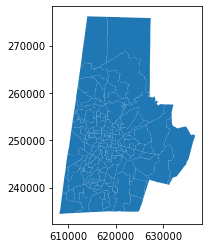

In [31]:
block_durham.plot()

In [ ]:
elem_durham.plot()